In [78]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [79]:
 from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [92]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


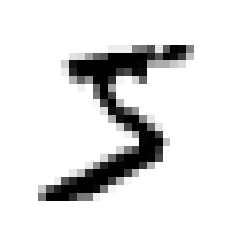

In [93]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [96]:
y[0]
y = y.astype(np.uint8)

In [97]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [98]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [99]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [100]:
 sgd_clf.predict([some_digit])


array([ True])

In [101]:
 from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [108]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

SyntaxError: invalid decimal literal (1728293978.py, line 2)

<AxesSubplot:>

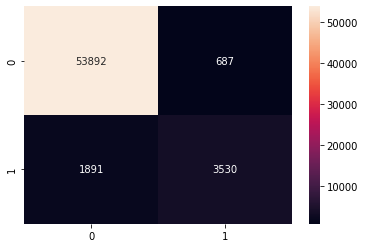

In [118]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
cm= confusion_matrix(y_train_5, y_train_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

In [107]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred)) 

0.8370879772350012
0.6511713705958311


In [119]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846

In [121]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [123]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

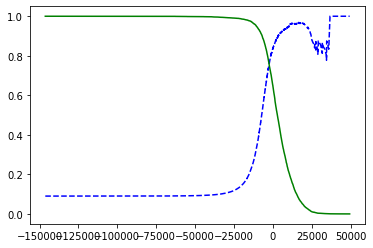

In [128]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 [...]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [129]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 

In [130]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [131]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [132]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

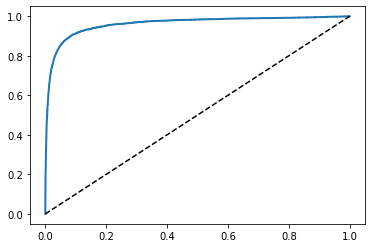

In [134]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()

In [135]:
from sklearn.metrics import roc_auc_score
>>> roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [136]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [137]:
y_train_pred = cross_val_predict(forest_clf,X_train,y_train_5, cv=3)

In [139]:
confusion_matrix(y_train_5,y_train_pred)

array([[54534,    45],
       [  725,  4696]], dtype=int64)

In [140]:
precision_score(y_train_5,y_train_pred)

0.9905083315756169

In [141]:
recall_score(y_train_5,y_train_pred)

0.8662608374838591

# MULTI-CLASS CLASSIFICATION

In [142]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [143]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [144]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [145]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.96445, 0.96255, 0.96645])

In [147]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

<AxesSubplot:>

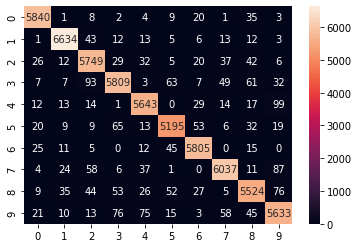

In [148]:
ax= plt.subplot()
sns.heatmap(conf_mx, annot=True, fmt='g', ax=ax)

In [149]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

<AxesSubplot:>

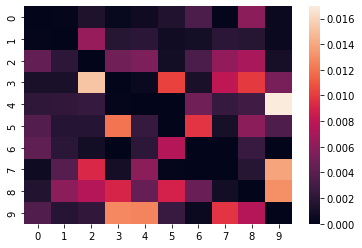

In [152]:
np.fill_diagonal(norm_conf_mx, 0)
ax=plt.subplot()
sns.heatmap(norm_conf_mx, fmt='g', ax=ax)